In [1]:
#pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [3]:
data= pd.read_csv('Handests Open Dataset - Data CSV Extract.txt', on_bad_lines='skip')
#data.to_csv('Handests Open Dataset - Data CSV Extract.csv', index=None)
data.head()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
1,5/31/2020,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,<18,NaN,NaN,Non-Saudi,1
2,1/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,NaN,26-35,SAU,Saudi Arabia,Saudi,1
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
4,9/30/2019,1202,Nokia 1202,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,N,N,N,NaN,36-55,BGD,Bangladesh,Non-Saudi,4


In [4]:
data= data[['CAL_DT', 'MODEL_NAME', 'BRAND_FULL_NAME', 'BRAND_NAME', 'VENDOR_NAME', 'OS_NAME', 'DEVICE_TYPE', 
    '_2G_FLG', '_3G_FLG', '_4G_FLG', 'WIFI_FLG', 'BLUETOOTH_FLG', 'TOUCH_SCREEN_FLG', 'DUAL_SIM_FLG', 
    'GENDER_TYPE_CD', 'NATIONALITY_CD', 'NATIONALITY_NAME', 'SAUDI_NON_SAUDI', 'DEVICE_COUNT', 'AGE_B']]
data.head()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT,AGE_B
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,LKA,Sri Lanka,Non-Saudi,9,36-55
1,5/31/2020,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,NaN,NaN,Non-Saudi,1,<18
2,1/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,NaN,SAU,Saudi Arabia,Saudi,1,26-35
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,BGD,Bangladesh,Non-Saudi,2,18-25
4,9/30/2019,1202,Nokia 1202,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,N,N,N,NaN,BGD,Bangladesh,Non-Saudi,4,36-55


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137816 entries, 0 to 3137815
Data columns (total 20 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   CAL_DT            object
 1   MODEL_NAME        object
 2   BRAND_FULL_NAME   object
 3   BRAND_NAME        object
 4   VENDOR_NAME       object
 5   OS_NAME           object
 6   DEVICE_TYPE       object
 7   _2G_FLG           object
 8   _3G_FLG           object
 9   _4G_FLG           object
 10  WIFI_FLG          object
 11  BLUETOOTH_FLG     object
 12  TOUCH_SCREEN_FLG  object
 13  DUAL_SIM_FLG      object
 14  GENDER_TYPE_CD    object
 15  NATIONALITY_CD    object
 16  NATIONALITY_NAME  object
 17  SAUDI_NON_SAUDI   object
 18  DEVICE_COUNT      int64 
 19  AGE_B             object
dtypes: int64(1), object(19)
memory usage: 478.8+ MB


In [6]:
data.shape

(3137816, 20)

In [7]:
data.describe()

,DEVICE_COUNT
count,3.137816e+06
mean,2.861259e+01
std,4.124590e+02
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.452100e+04


In [8]:
data = data.replace('Z', np.nan)
data = data.replace('unknown', 'Other')
data = data.replace('NA   ', np.nan)

In [9]:
data.isnull().sum()

CAL_DT                   0
MODEL_NAME               0
BRAND_FULL_NAME          0
BRAND_NAME               0
VENDOR_NAME              0
OS_NAME                  0
DEVICE_TYPE              0
_2G_FLG                  0
_3G_FLG                  0
_4G_FLG                  0
WIFI_FLG             36462
BLUETOOTH_FLG         5375
TOUCH_SCREEN_FLG     11982
DUAL_SIM_FLG          5023
GENDER_TYPE_CD      376740
NATIONALITY_CD      317927
NATIONALITY_NAME    317922
SAUDI_NON_SAUDI          0
DEVICE_COUNT             0
AGE_B               481613
dtype: int64

In [10]:
data= data.dropna()

In [11]:
data.shape

(2114730, 20)

In [12]:
data= data.reset_index(drop=True)
data.head()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT,AGE_B
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,LKA,Sri Lanka,Non-Saudi,9,36-55
1,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,BGD,Bangladesh,Non-Saudi,2,18-25
2,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,IDN,Indonesia,Non-Saudi,1,>55
3,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,EGY,Egypt,Non-Saudi,1,36-55
4,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,SYR,Syria,Non-Saudi,21,26-35


In [13]:
att= ['CAL_DT', 'MODEL_NAME', 'BRAND_FULL_NAME', 'BRAND_NAME', 'VENDOR_NAME', 'OS_NAME', 'DEVICE_TYPE', 
    '_2G_FLG', '_3G_FLG', '_4G_FLG', 'WIFI_FLG', 'BLUETOOTH_FLG', 'TOUCH_SCREEN_FLG', 'DUAL_SIM_FLG', 
    'GENDER_TYPE_CD', 'NATIONALITY_CD', 'NATIONALITY_NAME', 'SAUDI_NON_SAUDI', 'DEVICE_COUNT', 'AGE_B']

In [14]:
for i in att:
    print(data[i].value_counts())
    print('------------------')

10/31/2019    95569
11/30/2019    95062
12/31/2019    94784
2/29/2020     93971
1/31/2020     93955
3/31/2020     93657
4/30/2020     93195
5/31/2020     92477
6/30/2020     91714
7/31/2020     90297
8/31/2020     89248
9/30/2020     89043
10/31/2020    87972
8/31/2019     87101
9/30/2019     86838
6/30/2019     86048
7/31/2019     85756
5/31/2019     85221
4/30/2019     84325
3/31/2019     82868
2/28/2019     81575
1/31/2019     79760
12/31/2018    77433
11/30/2018    76861
Name: CAL_DT, dtype: int64
------------------
206               12448
105               12140
150 Dual SIM      12100
105 (2015)        11958
1 Dual Sim        11552
                  ...  
Duo 405             106
P20                  75
R1S                  59
x1                   24
V869 and i9+++        3
Name: MODEL_NAME, Length: 921, dtype: int64
------------------
Nokia 105             12140
Nokia 150 Dual SIM    12100
Nokia 105 (2015)      11958
Nokia 230 Dual SIM    11233
Nokia 108 Dual SIM    11223
       

In [15]:
data = data.drop(['CAL_DT'],axis=1)
data = data.drop(['MODEL_NAME'],axis=1)
data = data.drop(['BRAND_FULL_NAME'],axis=1)
data = data.drop(['NATIONALITY_CD'],axis=1)

In [16]:
data.drop_duplicates(keep='first', inplace=True)

In [17]:
data.shape

(283278, 16)

In [18]:
print(str(data['AGE_B'].unique()))

['36-55' '18-25' '>55  ' '26-35' '<18  ']


In [19]:
data['Age_Group']=data['AGE_B']

data['Age_Group'][(data.AGE_B=='<18  ')]= 'Young'
data['Age_Group'][(data.AGE_B=='18-25')]= 'Adult'
data['Age_Group'][(data.AGE_B=='26-35')]= 'Adult'
data['Age_Group'][(data.AGE_B=='36-55')]= 'Adult'
data['Age_Group'][(data.AGE_B=='>55  ')]= 'Old'
data = data.drop('AGE_B', axis=1)

data['Age_Group']=data['Age_Group'].astype('category')

data.head()

/var/folders/f0/cwn3lmm51vz9072rsychz2z40000gn/T/ipykernel_1451/618438299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Group'][(data.AGE_B=='<18  ')]= 'Young'
/var/folders/f0/cwn3lmm51vz9072rsychz2z40000gn/T/ipykernel_1451/618438299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Group'][(data.AGE_B=='18-25')]= 'Adult'
/var/folders/f0/cwn3lmm51vz9072rsychz2z40000gn/T/ipykernel_1451/618438299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT,Age_Group
0,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,Sri Lanka,Non-Saudi,9,Adult
1,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,Bangladesh,Non-Saudi,2,Adult
2,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,Indonesia,Non-Saudi,1,Old
3,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,Egypt,Non-Saudi,1,Adult
4,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,Syria,Non-Saudi,21,Adult


In [20]:
data['Age_Group'].value_counts()

Adult    220210
Old       53718
Young      9350
Name: Age_Group, dtype: int64

In [21]:
data['Age_Group'].value_counts()

Adult    220210
Old       53718
Young      9350
Name: Age_Group, dtype: int64

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_Group', ylabel='count'>

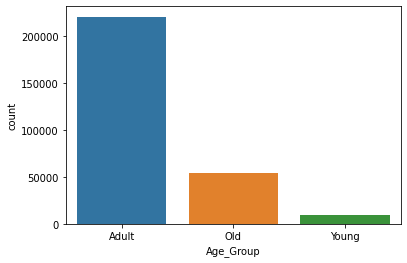

In [22]:
sns.countplot('Age_Group', data=data)

In [23]:
att=  ['BRAND_NAME', 'VENDOR_NAME', 'OS_NAME', 'DEVICE_TYPE', 
    '_2G_FLG', '_3G_FLG', '_4G_FLG', 'WIFI_FLG', 'BLUETOOTH_FLG', 'TOUCH_SCREEN_FLG', 'DUAL_SIM_FLG', 
    'GENDER_TYPE_CD', 'NATIONALITY_NAME', 'SAUDI_NON_SAUDI', 'Age_Group']

In [24]:
for i in att:
    data[i]= data[i].astype('category').cat.codes

In [25]:
data['Age_Group'].value_counts()

0    220210
1     53718
2      9350
Name: Age_Group, dtype: int64

In [26]:
data.head()

,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT,Age_Group
0,62,42,0,1,1,1,1,1,1,1,1,1,175,0,9,0
1,112,70,5,1,1,1,0,1,1,1,0,1,16,0,2,0
2,173,42,0,1,1,1,1,1,1,1,1,0,92,0,1,1
3,126,42,0,1,1,1,0,1,1,1,1,1,63,0,1,0
4,62,42,0,1,1,1,1,1,1,1,0,1,180,0,21,0


In [27]:
data.corr().style.background_gradient(cmap="Blues")

,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT,Age_Group
BRAND_NAME,1.000000,0.542916,0.012888,0.031592,-0.008694,0.055446,0.074745,0.050495,-0.012318,0.014701,-0.056792,-0.017835,-0.039359,-0.027355,0.044963,0.016074
VENDOR_NAME,0.542916,1.000000,0.545306,-0.403796,-0.021405,-0.335881,-0.389357,-0.361637,-0.184893,-0.464684,-0.268658,-0.008582,-0.025542,-0.024224,0.094963,0.070845
OS_NAME,0.012888,0.545306,1.000000,-0.708378,-0.019919,-0.634785,-0.655197,-0.679801,-0.271183,-0.791974,-0.317451,0.011797,-0.009491,-0.001965,0.066978,0.080190
DEVICE_TYPE,0.031592,-0.403796,-0.708378,1.000000,0.025782,0.872193,0.651146,0.910111,0.419404,0.891835,0.117680,0.007753,0.025035,0.049217,-0.112951,-0.080050
_2G_FLG,-0.008694,-0.021405,-0.019919,0.025782,1.000000,-0.021089,0.017880,0.027419,-0.009308,0.025398,0.040460,0.002296,-0.005304,-0.012607,0.003598,-0.005713
_3G_FLG,0.055446,-0.335881,-0.634785,0.872193,-0.021089,1.000000,0.636212,0.864863,0.423827,0.808372,0.084698,0.008274,0.030424,0.046606,-0.117651,-0.071708
_4G_FLG,0.074745,-0.389357,-0.655197,0.651146,0.017880,0.636212,1.000000,0.630090,0.290864,0.661685,0.174656,0.015357,0.012000,0.020553,-0.070608,-0.069522
WIFI_FLG,0.050495,-0.361637,-0.679801,0.910111,0.027419,0.864863,0.630090,1.000000,0.446033,0.871879,0.092951,0.002350,0.025433,0.046222,-0.121127,-0.076582
BLUETOOTH_FLG,-0.012318,-0.184893,-0.271183,0.419404,-0.009308,0.423827,0.290864,0.446033,1.000000,0.413150,0.302167,0.025655,0.024941,0.042488,-0.081809,-0.042102
TOUCH_SCREEN_FLG,0.014701,-0.464684,-0.791974,0.891835,0.025398,0.808372,0.661685,0.871879,0.413150,1.000000,0.204750,0.003235,0.024952,0.039148,-0.114592,-0.085327


In [28]:
y = data.Age_Group
X = data.drop(['Age_Group'],axis=1).to_numpy()

In [29]:
X[:, :-2]= MinMaxScaler().fit_transform(X[:, :-2])

In [30]:
smote = SMOTE(sampling_strategy = {0:220210, 1:220210, 2:220210}, random_state=42)

In [31]:
undersample = RandomUnderSampler(sampling_strategy='not minority')

In [32]:
X, y= smote.fit_resample(X,y)

In [33]:
X, y = undersample.fit_resample(X, y)

In [34]:
y.value_counts()

0    220210
1    220210
2    220210
Name: Age_Group, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
ann = Sequential()
ann.add(Dense(15, input_shape=(15, )))
ann.add(Dense(36,'relu'))
ann.add(Dense(24,'relu'))
ann.add(Dense(16,'relu'))
ann.add(Dense(3,'softmax'))
ann.summary()
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 36)                576       
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 2,155
Trainable params: 2,155
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = ann.fit(
    X_train, y_train, batch_size=32,
    validation_data=(X_test, y_test),
    epochs=60
)

Epoch 1/60
13126/13126 [==============================] - 31s 2ms/step - loss: 1.0190 - accuracy: 0.5075 - val_loss: 0.9494 - val_accuracy: 0.5285
Epoch 2/60
13126/13126 [==============================] - 30s 2ms/step - loss: 0.9533 - accuracy: 0.5272 - val_loss: 0.9454 - val_accuracy: 0.5283
Epoch 3/60
13126/13126 [==============================] - 34s 3ms/step - loss: 0.9384 - accuracy: 0.5352 - val_loss: 0.9214 - val_accuracy: 0.5474
Epoch 4/60
13126/13126 [==============================] - 35s 3ms/step - loss: 0.9242 - accuracy: 0.5442 - val_loss: 0.9194 - val_accuracy: 0.5491
Epoch 5/60
13126/13126 [==============================] - 34s 3ms/step - loss: 0.9142 - accuracy: 0.5502 - val_loss: 0.9042 - val_accuracy: 0.5561
Epoch 6/60
13126/13126 [==============================] - 33s 3ms/step - loss: 0.9066 - accuracy: 0.5569 - val_loss: 0.9112 - val_accuracy: 0.5549
Epoch 7/60
13126/13126 [==============================] - 30s 2ms/step - loss: 0.9007 - accuracy: 0.5607 - val_loss: 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

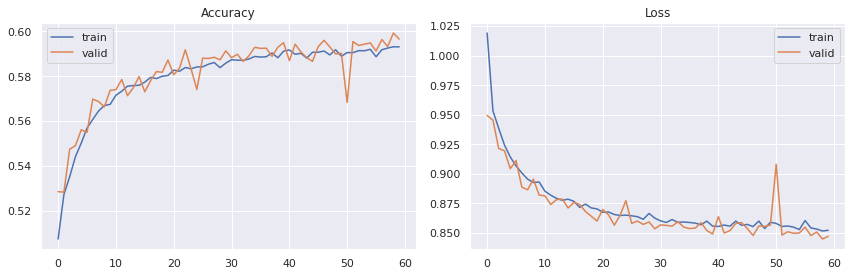

In [ ]:
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
plt.title('Loss')
plt.tight_layout()

plt.show()

test accuracy: 0.5965 %


              precision    recall  f1-score   support

           0       0.68      0.26      0.38     47778
           1       0.55      0.56      0.56     66242
           2       0.61      0.87      0.72     65988

    accuracy                           0.60    180008
   macro avg       0.61      0.57      0.55    180008
weighted avg       0.61      0.60      0.57    180008



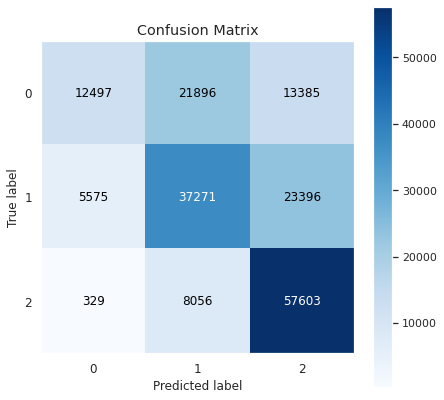

In [ ]:
yhat_test = ann.predict(X_test)
yhat_test = np.argmax(yhat_test, axis=1)
#ytest_ = np.argmax(y_test, axis=1)
#yhat_test = yhat_test > 0.5

scikitplot.metrics.plot_confusion_matrix(y_test, yhat_test, figsize=(7,7))
#pyplot.savefig("confusion_matrix_model3pipes.png")
test_accu= accuracy_score(y_test, yhat_test)
#test_accu = np.sum(y_test == yhat_test) / len(y_test) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")

print(classification_report(y_test, yhat_test))

In [36]:
RF =  RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
RF_pred= RF.predict(X_test)

In [38]:
AccuracyRF= accuracy_score(y_test, RF_pred)
print('Accuracy= ', AccuracyRF)

Accuracy=  0.5518974312398771


In [39]:
print(classification_report(y_test, RF_pred, target_names=['Adult', 'Old', 'Young']))

              precision    recall  f1-score   support

       Adult       0.60      0.43      0.50     66016
         Old       0.51      0.42      0.46     66042
       Young       0.55      0.80      0.65     66131

    accuracy                           0.55    198189
   macro avg       0.55      0.55      0.54    198189
weighted avg       0.55      0.55      0.54    198189



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

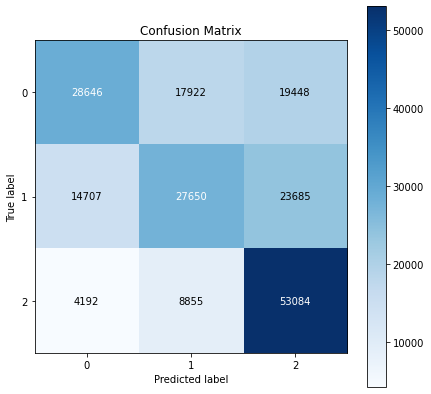

In [40]:
scikitplot.metrics.plot_confusion_matrix(y_test, RF_pred, figsize=(7,7))

In [41]:
GB =  GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [42]:
GB_pred= GB.predict(X_test)

In [43]:
AccuracyGB= accuracy_score(y_test, GB_pred)
print('Accuracy= ', AccuracyGB)

Accuracy=  0.520649481050916


In [45]:
print(classification_report(y_test, GB_pred, target_names=['Adult', 'Old', 'Young']))

              precision    recall  f1-score   support

       Adult       0.59      0.37      0.46     66016
         Old       0.45      0.46      0.46     66042
       Young       0.54      0.72      0.62     66131

    accuracy                           0.52    198189
   macro avg       0.53      0.52      0.51    198189
weighted avg       0.53      0.52      0.51    198189



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

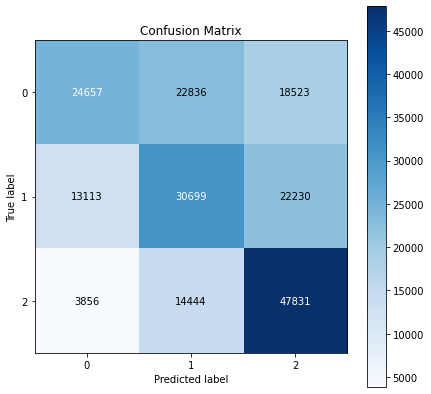

In [46]:
scikitplot.metrics.plot_confusion_matrix(y_test, GB_pred, figsize=(7,7))

In [47]:
DT =  DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
DT_pred= DT.predict(X_test)

In [49]:
AccuracyDT= accuracy_score(y_test, DT_pred)
print('Accuracy= ', AccuracyDT)

Accuracy=  0.5506309633733456


In [50]:
print(classification_report(y_test, DT_pred, target_names=['Adult', 'Old', 'Young']))

              precision    recall  f1-score   support

       Adult       0.60      0.44      0.51     66016
         Old       0.51      0.41      0.45     66042
       Young       0.55      0.80      0.65     66131

    accuracy                           0.55    198189
   macro avg       0.55      0.55      0.54    198189
weighted avg       0.55      0.55      0.54    198189



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

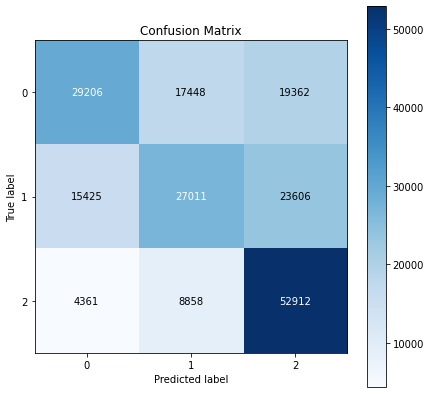

In [51]:
scikitplot.metrics.plot_confusion_matrix(y_test, DT_pred, figsize=(7,7))